In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pprint as pp

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
cols_to_scale = df_market_data.select_dtypes(include=["float64"]).columns
scaled_data = scaler.fit_transform(df_market_data[cols_to_scale])


In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data)

# Copy the crypto names from the original DataFrame
scaled_df["coin_id"] = df_market_data.index

# Set the coin_id column as index
scaled_df.set_index("coin_id", inplace=True)

## Set the column labels
scaled_df.columns = df_market_data.columns

# Display the scaled DataFrame
pp.pprint(scaled_df)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_vals1 = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inert_vals1 = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_vals1:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans1 = KMeans(n_clusters=i, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans1.fit(scaled_df)
# 3. Append the model.inertia_ to the inertia list
    inert_vals1.append(kmeans1.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict1 = {
    "k": k_vals1,
    "inertia": inert_vals1
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df1 = pd.DataFrame(elbow_dict1)

pp.pprint(elbow_df1)

     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


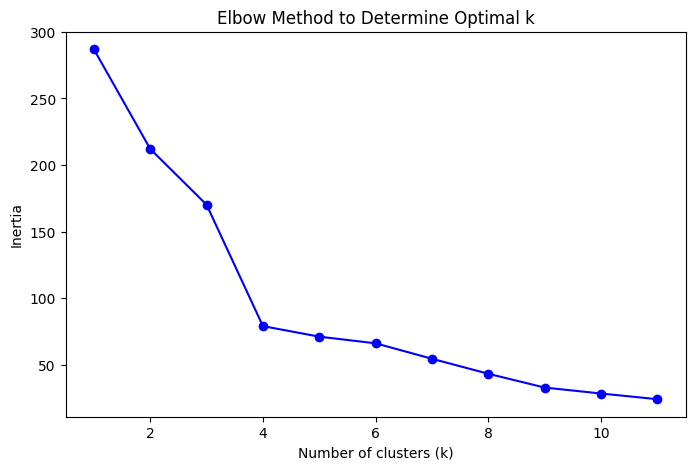

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(k_vals1, inert_vals1, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Most likely 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
kmeans_4_1 = KMeans(n_clusters = 4, random_state=42)

In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans_4_1.fit(scaled_df)
#print(kmeans_4.cluster_centers_)

KMeans(n_clusters=4, random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters1 = kmeans_4_1.predict(scaled_df)

# Print the resulting array of cluster values.
pp.pprint(clusters1)

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)


In [14]:
# Create a copy of the scaled DataFrame
scaled_copy_df = scaled_df.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_copy_df['cluster'] = clusters1

# Display the copy of the scaled DataFrame
pp.pprint(scaled_copy_df)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot1 = scaled_copy_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    width=800,
    height=400
)
scatter_plot1

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca_model.fit_transform(scaled_df)

# View the scaled PCA data
pp.pprint(pca_data)

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [20]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_df.index

# Set the coin_id column as index
pca_df.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
pca_df

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k_vals2 = list(range(1, 12))
pp.pprint(k_vals2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [22]:
# Create an empty list to store the inertia values
inert_vals2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k_vals2:
    kmeans2 = KMeans(n_clusters=i, random_state=42)
    kmeans2.fit(pca_df)
    inert_vals2.append(kmeans2.inertia_)

pp.pprint(inert_vals2)

[256.8740855678921,
 182.33953007775625,
 140.43183298408348,
 49.66549665179731,
 42.051901097917195,
 31.749005244388982,
 28.03186917255272,
 19.451747206041333,
 13.814081971558082,
 10.63064757387096,
 10.120242629957753]


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict2 = {
    'k': k_vals2,
    'inertia': inert_vals2
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_dict2)


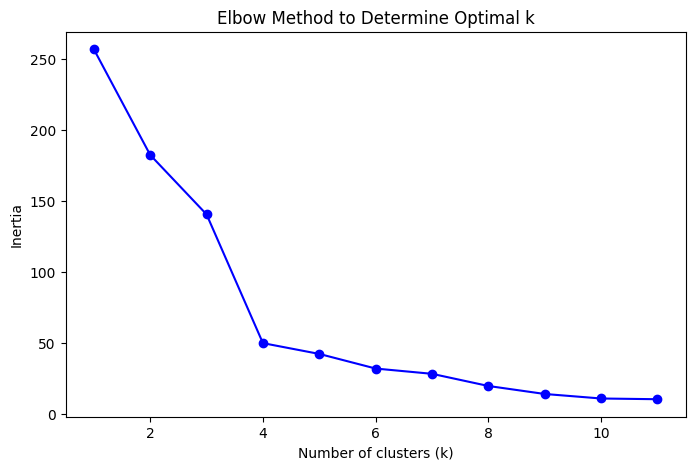

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 5))
plt.plot(k_vals2, inert_vals2, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
kmeans_4_2 = KMeans(n_clusters=4, random_state=42)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_4_2.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters2 = kmeans_4_2.predict(pca_df)

# Print the resulting array of cluster values.
pp.pprint(clusters2)

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)


In [28]:
# Create a copy of the scaled PCA DataFrame
pca_copy_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_copy_df['cluster'] = clusters2

# Display the copy of the scaled PCA DataFrame
pp.pprint(pca_copy_df)

                           PC1       PC2       PC3  cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        2
ripple               -0.471835 -0.222660 -0.479053        2
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        2
crypto-com-chain     -0.248198 -1.376252 -1.462026        2
usd-coin             -0.438408 -0.175337 -0.663388        2
eos                  -0.693425 -0.473815 -0.527597        2
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192

In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot2 = pca_copy_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters after PCA',
    width=800,
    height=400
)

scatter_plot2

:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

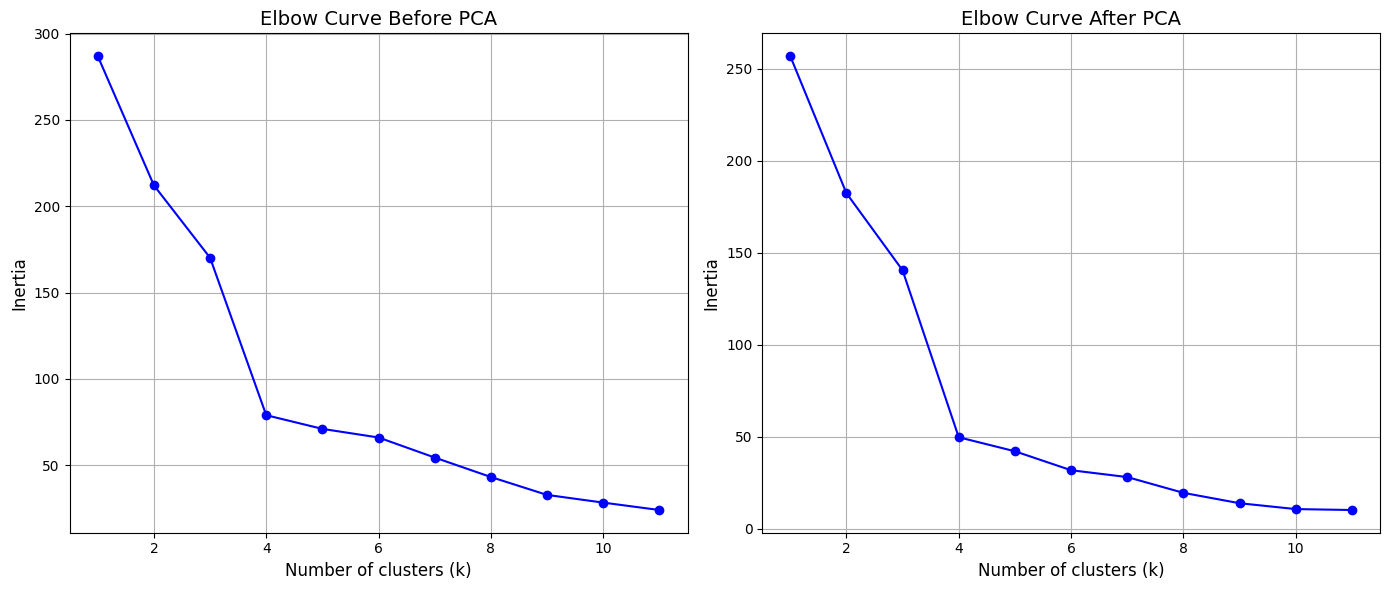

In [30]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(k_vals1, inert_vals1, marker='o', linestyle='-', color='b')
axes[0].set_title('Elbow Curve Before PCA', fontsize=14)
axes[0].set_xlabel('Number of clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].grid(True)


axes[1].plot(k_vals2, inert_vals2, marker='o', linestyle='-', color='b')
axes[1].set_title('Elbow Curve After PCA', fontsize=14)
axes[1].set_xlabel('Number of clusters (k)', fontsize=12)
axes[1].set_ylabel('Inertia', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

composite_plot = scatter_plot1 + scatter_plot2

composite_plot.opts(width=600, height=400)

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** There doesn't appear to have been a considerable difference in the clustering results after performing PCA.